#Exercise

Estimate the location from WIFI Signal Strength

The dataset has 2,000 rows and 8 columns. The data contains wifi signal strength observed from 7 wifi devices on a smartphone collected in an indoor space which could be used to estimate the location in one of the four rooms.

You can use ANN analysis for this exercise to improve the ANN performance.

In [35]:
#Mounting Drive to Google Colab
from google.colab import drive 
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [37]:
path = '/drive/MyDrive/Colab Notebooks/wifi.csv'
wifi = pd.read_csv(path)

In [38]:
wifi

,Wifi 1,Wifi 2,Wifi 3,Wifi 4,Wifi 5,Wifi 6,Wifi 7,Room
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1
...,...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94,4
1996,-59,-56,-50,-62,-47,-87,-90,4
1997,-62,-59,-46,-65,-45,-87,-88,4
1998,-62,-58,-52,-61,-41,-90,-85,4


In [39]:
wifi.columns

Index(['Wifi 1', 'Wifi 2', 'Wifi 3', 'Wifi 4', 'Wifi 5', 'Wifi 6', 'Wifi 7',
       'Room'],
      dtype='object')

In [42]:
# One hot encoding
room_dummies = pd.get_dummies(wifi['Room'])
room_dummies

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1995,0,0,0,1
1996,0,0,0,1
1997,0,0,0,1
1998,0,0,0,1


In [44]:
# To view the comparison
df = pd.concat([wifi['Room'], room_dummies], axis = 1)

In [46]:
y = df.drop('Room', axis = 1)

In [47]:
X = wifi.drop('Room', axis = 1)

In [48]:
y

,1,2,3,4
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1995,0,0,0,1
1996,0,0,0,1
1997,0,0,0,1
1998,0,0,0,1


In [49]:
X

,Wifi 1,Wifi 2,Wifi 3,Wifi 4,Wifi 5,Wifi 6,Wifi 7
0,-64,-56,-61,-66,-71,-82,-81
1,-68,-57,-61,-65,-71,-85,-85
2,-63,-60,-60,-67,-76,-85,-84
3,-61,-60,-68,-62,-77,-90,-80
4,-63,-65,-60,-63,-77,-81,-87
...,...,...,...,...,...,...,...
1995,-59,-59,-48,-66,-50,-86,-94
1996,-59,-56,-50,-62,-47,-87,-90
1997,-62,-59,-46,-65,-45,-87,-88
1998,-62,-58,-52,-61,-41,-90,-85


In [50]:
y.value_counts()

1  2  3  4
0  0  0  1    500
      1  0    500
   1  0  0    500
1  0  0  0    500
dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1600, 7)
(1600, 4)
(400, 7)
(400, 4)


In [55]:
# Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [76]:
from keras.models import Sequential
from keras.layers import Dense

In [77]:
# Building the sequential model

L1 = 150
L2 = 150

model = Sequential()
model.add(Dense(L1, input_dim=7, activation = 'relu'))
model.add(Dense(L2,activation='relu'))

# output layer
model.add(Dense(4, activation='softmax'))

In [78]:
# compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [79]:
# training the model for 10 epochs
history = model.fit(X_train, y_train, epochs = 20, batch_size = 100, validation_data=(X_test,y_test))

Epoch 1/20
16/16 [==============================] - 1s 14ms/step - loss: 0.8556 - accuracy: 0.8188 - val_loss: 0.5413 - val_accuracy: 0.8650
Epoch 2/20
16/16 [==============================] - 0s 5ms/step - loss: 0.3754 - accuracy: 0.9256 - val_loss: 0.2794 - val_accuracy: 0.9400
Epoch 3/20
16/16 [==============================] - 0s 4ms/step - loss: 0.1975 - accuracy: 0.9588 - val_loss: 0.1751 - val_accuracy: 0.9500
Epoch 4/20
16/16 [==============================] - 0s 5ms/step - loss: 0.1295 - accuracy: 0.9650 - val_loss: 0.1358 - val_accuracy: 0.9575
Epoch 5/20
16/16 [==============================] - 0s 5ms/step - loss: 0.1013 - accuracy: 0.9700 - val_loss: 0.1125 - val_accuracy: 0.9650
Epoch 6/20
16/16 [==============================] - 0s 5ms/step - loss: 0.0880 - accuracy: 0.9744 - val_loss: 0.0984 - val_accuracy: 0.9675
Epoch 7/20
16/16 [==============================] - 0s 5ms/step - loss: 0.0778 - accuracy: 0.9775 - val_loss: 0.0974 - val_accuracy: 0.9750
Epoch 8/20
16/16 [=

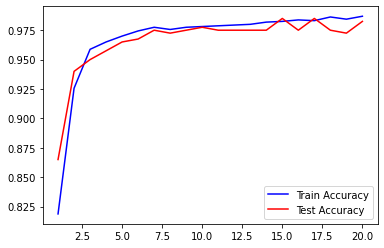

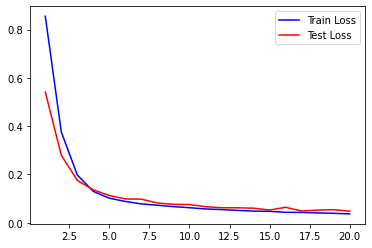

In [80]:
import matplotlib.pyplot as plt

acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc2)+1)

plt.plot(epochs, acc2,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

In [81]:
# Model with initializer and regularizer
from keras import initializers
from keras import regularizers

In [82]:
# Building the sequential model

L1 = 150
L2 = 150

model = Sequential()
model.add(Dense(L1, input_dim=7, activation = 'relu', 
                kernel_initializer='he_normal', 
                kernel_regularizer=regularizers.L2(0.01)))
model.add(Dense(L2,activation='relu'))

# output layer
model.add(Dense(4, activation='softmax'))

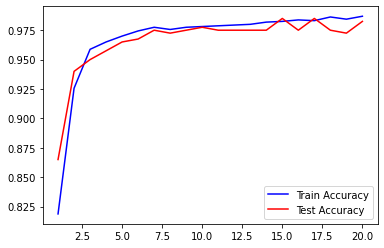

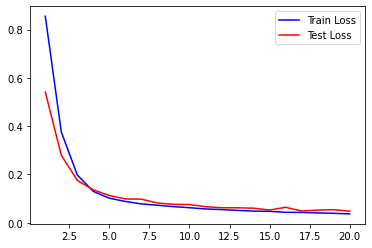

In [83]:
import matplotlib.pyplot as plt

acc2 = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc2)+1)

plt.plot(epochs, acc2,'b',label='Train Accuracy')
plt.plot(epochs, val_acc,'r',label='Test Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()